SVM from scratch accuracy: 100.00%


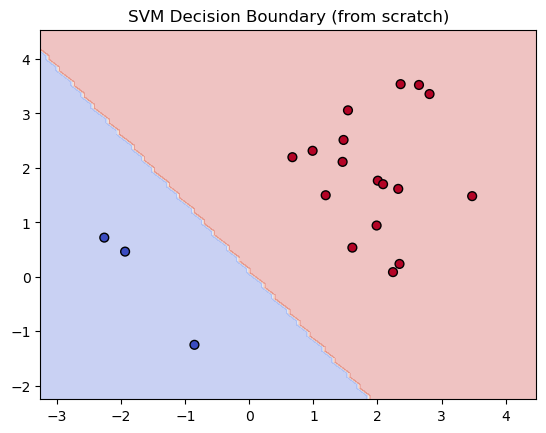

scikit-learn SVM accuracy: 100.00%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Generate Data
def generate_data(n_samples=100, random_seed=42):
    np.random.seed(random_seed)
    X1 = np.random.multivariate_normal([2,2], [[1,0],[0,1]], n_samples//2)
    y1 = np.ones(n_samples//2)
    X2 = np.random.multivariate_normal([-2,-2], [[1,0],[0,1]], n_samples//2)
    y2 = -1 * np.ones(n_samples//2)
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    return X[indices], y[indices]

X, y = generate_data()

# 2. Linear SVM from Scratch
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx]*(np.dot(x_i, self.w)+self.b) < 1
                if condition:
                    # misclassified
                    self.w -= self.lr * (2*self.lambda_param*self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * (-y[idx])
                else:
                    # correct classification
                    self.w -= self.lr * (2*self.lambda_param*self.w)
                    
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# 3. Train & Evaluate
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

svm_clf = LinearSVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"SVM from scratch accuracy: {accuracy*100:.2f}%")

# 4. Visualization (for 2D data)
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("SVM Decision Boundary (from scratch)")
    plt.show()

plot_decision_boundary(X_test, y_test, svm_clf)

# 5. Compare with scikit-learn
sklearn_svm = SVC(kernel='linear', C=100)
sklearn_svm.fit(X_train, y_train)
y_pred_sklearn = sklearn_svm.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"scikit-learn SVM accuracy: {accuracy_sklearn*100:.2f}%")
